<a href="https://colab.research.google.com/github/vinicius-pf/Challenge_DataScience/blob/Semana-2/Semana%202/%20An%C3%A1lises%20Gr%C3%A1ficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Data Science - Semana 2

Para a segunda semana, a Alura Voz pediu que fossem feitas análises gráficas com a variável target: a coluna `Churn`.

Além de investigar a distribuição da variável, também foi requisitado visualizações relevantes em conjunto com as outras variáveis e uma verificação a respeito da correlação entre elas.

Para essa semana, os dados serão os mesmos que foram [tratados anteriormente](https://github.com/vinicius-pf/Challenge_DataScience/blob/main/Semana%201/Tratamento_dos_Dados.ipynb). No entanto, será feita uma mudança a pedido da empresa, na variável `Valor_Total`.

## Importando os Dados

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/vinicius-pf/Challenge_DataScience/main/Semana%201/dados/dados_evasao_completos.csv'


dados = pd.read_csv(url)

In [ ]:
dados.head()

,ID_Cliente,Evasao,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiplas,Servico_Internet,...,Adiconal_Protecao,Adicional_Suporte,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Valor_Dia,Conta_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,2.19,Sim,Cheque,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,2.00,Não,Cheque,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra Óptica,...,Sim,Não,Não,Não,Mensal,2.46,Sim,Cheque eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra Óptica,...,Sim,Não,Sim,Sim,Mensal,3.27,Sim,Cheque eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra Óptica,...,Não,Sim,Sim,Não,Mensal,2.80,Sim,Cheque,83.9,267.40


### Corrigindo problemas

Após a conclusão da limpeza de dados, a empresa notou um problema neles. A coluna `Valor_Total` recebeu valores `0` quando o cliente possuía 0 meses de contrato. No entanto, a empresa pediu que esse valor fosse alterado para o valor existente na coluna `Valor_Mensal`.

Antes de prosseguir com as análises, será feita essa mudança e os dados corrigidos serão exportados novamente.

In [ ]:
dados.loc[dados['Tempo_Contrato'] == 0]

,ID_Cliente,Evasao,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiplas,Servico_Internet,...,Adiconal_Protecao,Adicional_Suporte,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Valor_Dia,Conta_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
945,1371-DWPAZ,Não,Feminino,Não,Sim,Sim,0,Não,Sem serviço de telefone,DSL,...,Sim,Sim,Sim,Não,Bianual,1.87,Não,Cartão de crédito (automática),56.05,0.0
1731,2520-SGTTA,Não,Feminino,Não,Sim,Sim,0,Sim,Não,Não,...,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Bianual,0.67,Não,Cheque,20.00,0.0
1906,2775-SEFEE,Não,Masculino,Não,Não,Sim,0,Sim,Sim,DSL,...,Não,Sim,Não,Não,Bianual,2.06,Sim,Tranferência bancária (automática),61.90,0.0
2025,2923-ARZLG,Não,Masculino,Não,Sim,Sim,0,Sim,Não,Não,...,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Anual,0.66,Sim,Cheque,19.70,0.0
2176,3115-CZMZD,Não,Masculino,Não,Não,Sim,0,Sim,Não,Não,...,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Bianual,0.68,Não,Cheque,20.25,0.0
2250,3213-VVOLG,Não,Masculino,Não,Sim,Sim,0,Sim,Sim,Não,...,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Bianual,0.85,Não,Cheque,25.35,0.0
2855,4075-WKNIU,Não,Feminino,Não,Sim,Sim,0,Sim,Sim,DSL,...,Sim,Sim,Sim,Não,Bianual,2.44,Não,Cheque,73.35,0.0
3052,4367-NUYAO,Não,Masculino,Não,Sim,Sim,0,Sim,Sim,Não,...,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Bianual,0.86,Não,Cheque,25.75,0.0
3118,4472-LVYGI,Não,Feminino,Não,Sim,Sim,0,Não,Sem serviço de telefone,DSL,...,Sim,Sim,Sim,Não,Bianual,1.75,Sim,Tranferência bancária (automática),52.55,0.0
4054,5709-LVOEQ,Não,Feminino,Não,Sim,Sim,0,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Bianual,2.70,Não,Cheque,80.85,0.0


In [ ]:
idx = dados[dados['Valor_Total'] == 0].index
dados.loc[idx, "Valor_Total"] = dados.loc[idx, "Valor_Mensal"]

Com a correção efetuada, as análises poderão ser feitas com mais clareza e coerência. Além disso, os dados podem ser exportados para utilização em outras análises.

In [ ]:
dados.to_csv('dados_corrigidos.csv')

## Importando a biblioteca

Para as análises que a empresa deseja receber, será usada a biblioteca [Plotly](https://plotly.com/graphing-libraries/). Essa é uma biblioteca que permite gráficos interativos em diversas linguagens de programação, incluindo Python. 

In [ ]:
import plotly


plotly.__version__

'5.5.0'

Com a biblioteca imnportada, pode-se começar as análises gráficas.

## Analisando a variável `Evasao`

Primeiramente, a empresa pediu que a variável `Evasao` fosse analisada e verificada sua distribuição. 

Para isso, podemos fazer análises com pandas utilizando o método [`.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html). Será criada uma tabela para que possam ser vistos o valor total de cada categoria e o valor relativo.

In [ ]:
tabela_frequencias = pd.merge(
    left = dados['Evasao'].value_counts(sort = False),
    right = dados['Evasao'].value_counts(normalize=True, sort = False),
    left_index = True,
    right_index = True
)

tabela_frequencias

,Evasao_x,Evasao_y
Não,5174,0.73463
Sim,1869,0.26537


Para ficar com informações mais claras, deve-se alterar os nomes da coluna e formatar a segunda coluna, que mostra o percentual.

In [ ]:
tabela_frequencias.rename(columns={
    'Evasao_x': 'Frequências',
    'Evasao_y': 'Percentual'}, inplace = True)

tabela_frequencias.rename_axis('Evasão', inplace = True)

In [ ]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})

,Frequências,Percentual
Evasão,,
Não,5174,73.46%
Sim,1869,26.54%


De acordo com o dataset, 26% dos clientes evadiram a empresa. Essa taxa alta explica a necessidade da empresa em entender a **Taxa de Evasão**.

Além de visualizações com tabelas, gráficos podem ser utilizados para as análises. Para essa análise, [um histograma](https://plotly.com/python/histograms/) será utilizado.

In [ ]:
import plotly.express as px

fig = px.histogram(dados, x='Evasao')

fig.show()

Após a criação do gráfico, foi percebido a necessidade de um ajuste. Para isso, será criada uma função que, além de ajustar, também formatará o gráfico com título.

In [ ]:
def bota_titulo(titulo):

    fig.update_layout(
        title_text = titulo,
        title_xanchor = "center",
        title_x = 0.5,
        autosize=False,
        width=600,
        height=600,
    )


In [51]:
import plotly.express as px


fig = px.histogram(dados, x='Evasao', color = 'Evasao')

bota_titulo('Contagem de evasão')

fig.update_layout(legend_title = 'Evasão')

fig.update_xaxes(title_text='Evasão',
                 type = 'category')
fig.update_yaxes(title_text='Nº Clientes')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))

fig.show()

Para corrigir as labels presentes quando se foca em uma barra, foi utilizado a solução apresentada no [GitHub](https://github.com/plotly/plotly.py/issues/2876)

Além da contagem, pode-se visualizar a diferença em percentual dos clientes que evadiram ou não. O método [.histogram()](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) possui configurações para criar uma visualização desta maneira, porém os testes não foram bem sucedidos. Por isso, será utilizado um gráfico de pizza, apesar de não ser o ideal para visualizações de dados.

In [ ]:
import plotly.express as px

fig = px.pie(dados, names='Evasao')

bota_titulo('Percentual de evasão')

fig.update_layout(legend_title = 'Evasão')

fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))

fig.show()

## Correlacionando as colunas

Para serem feitas análises claras, além de entender as principais colunas, deve-se analisar e entender a correlação entre as colunas. A biblioteca pandas tem o método [`.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) para realizar essa comparação. 


In [ ]:
dados.corr()

,Tempo_Contrato,Valor_Dia,Valor_Mensal,Valor_Total
Tempo_Contrato,1.000000,0.247910,0.247900,0.826164
Valor_Dia,0.247910,1.000000,0.999996,0.651197
Valor_Mensal,0.247900,0.999996,1.000000,0.651182
Valor_Total,0.826164,0.651197,0.651182,1.000000


Nas colunas numéricas, os valores de `Tempo_Contrato` e `Valor_Total` apresentam uma correlação forte. O mesmo acontece para as variáveis `Valor_Total` e `Valor_Mensal`, além de `Valor_Dia` e `Valor_Mensal`. Isso se deve ao fato de algumas variáveis serem calculadas com base em outra coluna do DataFrame, como é o caso da coluna `Valor_Dia`.

O método da biblioteca pandas trabalha a correlação apenas de variáveis numéricas. Para resolver isso, pode-se tratar os dados para que todas as variáveis sejam numéricas, permitindo analisa a matriz de correlação mais facilmente.


No entanto, também há outros métodos para calcular a correlação de variáveis categóricas, que são a maioria das variáveis presentes no sistema.

Para isso, usarei o módulo python [Dython](http://shakedzy.xyz/dython/). Esse módulo permite calcular as correlações e associações de forma mais clara e veloz.

Para essa análise, será utilizado o método [.associations()](http://shakedzy.xyz/dython/getting_started/examples/). Essa funcionalidade calcula as correlações de variáveis numéricas e as associações entre variáveis categóricas. Para a assossiação será usado o método [Cramers' V](https://en.wikipedia.org/wiki/Cramér's_V), que é uma forma de associar duas variáveis categóricas. O método dá um valor entre 0 e 1 para cada par, sendo 0 para quando não há nenhuma relação e 1 quando a variável é completamente determinada pela outra.

In [ ]:
pip install dython

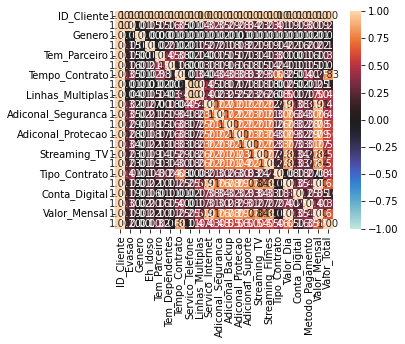

{'ax': <AxesSubplot:>,
 'corr':                     ID_Cliente    Evasao    Genero  Eh_Idoso  Tem_Parceiro  \
 ID_Cliente                 1.0  1.000000  1.000000  1.000000      1.000000   
 Evasao                     1.0  1.000000  0.008291  0.150453      0.150126   
 Genero                     1.0  0.008291  1.000000  0.001488      0.001524   
 Eh_Idoso                   1.0  0.150453  0.001488  1.000000      0.016093   
 Tem_Parceiro               1.0  0.150126  0.001524  0.016093      1.000000   
 Tem_Dependentes            1.0  0.163870  0.010207  0.210765      0.452366   
 Tempo_Contrato             1.0  0.352229  0.005106  0.016567      0.379697   
 Servico_Telefone           1.0  0.011398  0.006008  0.007925      0.017225   
 Linhas_Multiplas           1.0  0.040109  0.009452  0.146643      0.143898   
 Servico_Internet           1.0  0.322455  0.011320  0.265324      0.000907   
 Adiconal_Seguranca         1.0  0.347400  0.017025  0.211070      0.152010   
 Adicional_Backup    

In [ ]:
from dython.nominal import associations

associations(dados, cramers_v_bias_correction = False)

Para melhorar a visualização, os dados serão tratados. A coluna `ID_Cliente` recebeu valores 1 para todas as outras colunas. Isso se dá por conter apenas valores únicos, então ela será eliminada das análises futuras.

O método retornou tanto um mapa de calor quanto uma tabela de valores. É possivel alterar essa funcionalidade.

In [ ]:
dados_sem_id = dados.drop('ID_Cliente', axis = 1)

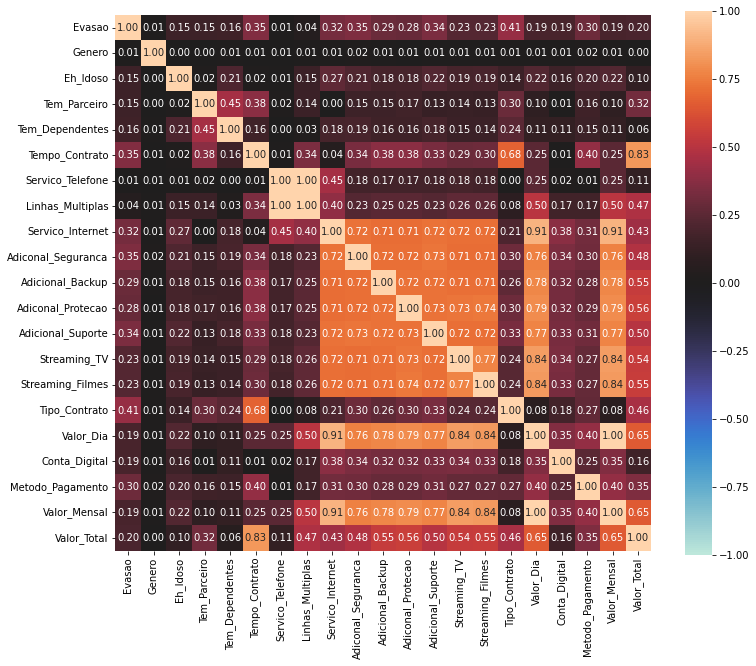

In [ ]:
from dython.nominal import associations

ax, corr = associations(dados_sem_id, cramers_v_bias_correction = False, figsize = (12,10))

Analisando o gráfico, percebe-se alguns padrões:

1 - As colunas `Servico_Internet`,`Adicional_Seguranca`,`Adicional_Backup`,`Adicional_Protecao`,`Adicional_Suporte`,`Streaming_TV`,`Streaming_Filmes` possuem forte correlação entre si. Há valores nas outras colunas que são dependentes da coluna `Servico_Internet`: o cliente que não contratou serviço de internet sempre terá o mesmo valor nas outras colunas.

2 - Há uma alta relação entre `Servico_Telefone` e `Linhas_Multiplas`. Isso pode ter o mesmo motivo que a relação das colunas a respeito de serviços online.

3 - A coluna *target*, `Evasao`, apresenta relação fraca com as colunas `Servico_Internet`,`Adicional_Seguranca`,`Adicional_Backup`,`Adicional_Protecao`,`Adicional_Suporte`,`Streaming_TV`, `Streaming_Filmes`, `Tipo_Contrato`, `Tempo_Contrato`, `Metodo_Pagamento` e `Valor_Total`. Com as outras colunas há uma relação muito fraca.

4 - A variável `Servico_Internet` tem uma relação forte com as colunas `Valor_Mensal` e `Valor_Dia`. As colunas relacionadas à `Servico_Internet` também possuem correlação com as variáveis financeiras, porém de menor intensidade.

5 - A variável `Tempo_Contrato` possue relação com as variáveis `Tipo_Contrato` e `Metodo_Pagamento`. Também possue relação pouco forte com os serviços de internet e a coluna `Linhas_Multiplas`.

6 - As colunas `Tem_Parceiro` e `Tem_Dependentes` tem uma relação pouco forte entre si. As outras colunas não possuem relação com as variáveis.

## Análises gráficas

A empresa requisitou que fossem criadas visualizações releventes para a variável `Evasao`. Por isso, foram selecionadas algumas colunas para que fossem gerados gráficos a título de comparação e exploração. 

De acordo com a correlação entre as variáveis, foram selecionadas as seguintes colunas: `Valor_Mensal`, `Tempo_Contrato`, `Servico_Internet`, `Servico_Telefone`, `Tipo_Contrato`, `Conta_Digital` e `Metodo_Pagamento`.

As colunas que possuem relacionamento forte com as variáveis `Valor_Mensal`, `Servico_Internet` e `Servico_Telefone` não foram analisadas. As outras variáveis presentes não possuem relação com a variável target e também não receberam uma análise gráfica profunda.

### Coluna `Valor_Mensal`

As colunas `Valor_Mensal`, `Valor_Total` e `Valor_Dia` possuem forte correlação entre si. Por conta disso, apenas a coluna `Valor_Mensal` foi escolhida para essa análise.

Para isso, será comparado a média do valor pago mensal, em conjunto com a evasão ou não do cliente.

In [53]:
import plotly.express as px

grupo = dados[['Evasao', 'Valor_Mensal']].groupby('Evasao').mean()
fig = px.bar(grupo, x=grupo.index, y='Valor_Mensal', color = grupo.index)

bota_titulo('Média de valor pago mensalmente')

fig.update_layout(legend_title = 'Evasão')

fig.update_xaxes(title_text='Evasão',
                 type = 'category')
fig.update_yaxes(title_text='Média de valor')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Valor_Mensal", "Média mensal")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))

fig.show()

Esse gráfico mostra que os clientes que evadiram gastaram mais, em média de valor mensal, quando comparados com os que não evadiram. Isso pode ser uma explicação para o motivo do cancelamento de contrato.

### Coluna `Tempo_Contrato`

Essa é outra coluna numérica. Para isso, podemos comparar utilizando a média novamente. 

In [55]:
import plotly.express as px

grupo = dados[['Evasao', 'Tempo_Contrato']].groupby('Evasao').mean()
fig = px.bar(grupo, x=grupo.index, y='Tempo_Contrato', color = grupo.index)

bota_titulo('Média de tempo de contrato de acordo com a Evasão')

fig.update_layout(legend_title = 'Evasão')

fig.update_xaxes(title_text='Evasão',
                 type = 'category')
fig.update_yaxes(title_text='Média de tempo de contrato')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tempo_Contrato", "Tempo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))

fig.show()

Percebe-se que os clientes que evadiram possuem uma média de tempo de contrato menor que os que não evadiram. Podemos ampliar as análises e ver a distribuição do tempo de contrato de acordo com a variável target.

In [56]:
import plotly.express as px


temp = dados.query('Evasao == "Sim"')
temp = temp.sort_values(by = 'Tempo_Contrato', ascending = True)
fig = px.histogram(temp, x='Tempo_Contrato')

bota_titulo('Dispersão do tempo de contrato')

fig.update_xaxes(title_text='Tempo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')


fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tempo_Contrato", "Tempo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº clientes evadidos")))

fig.show()

In [57]:
import plotly.express as px

temp = dados.query('Evasao == "Não"')
temp = temp.sort_values(by = 'Tempo_Contrato', ascending = True)
fig = px.histogram(temp, x='Tempo_Contrato')

bota_titulo('Dispersão do tempo de contrato')

fig.update_xaxes(title_text='Tempo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')


fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tempo_Contrato", "Tempo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº clientes ativos")))


fig.show()

Ao fazer uma comparação com os dois gráficos, percebe-se que:

- Os clientes que cancelaram possuem menos tempo de contrato dos que não cancelaram.

- Quando mais tempo de contrato do cliente, menor a chance dele efetuar o cancelamento.

Há ainda um problema: quando verificado individualmente, parece que há períodos de tempo de contrato em que há mais cancelamentos que não cancelamentos.

Para comparação, será criado um gráfico em que o tempo de contrato é menor que 10 meses.

In [58]:
import plotly.express as px


temp = dados.query('Tempo_Contrato <= 10')
temp = temp.sort_values(by = 'Tempo_Contrato', ascending = True)


fig = px.histogram(temp, x='Tempo_Contrato', color = 'Evasao', barmode = 'group')

bota_titulo('Dispersão entre os contratos até 10 meses')

fig.update_layout(legend_title = 'Evasão')

fig.update_xaxes(title_text='Tempo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')


fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tempo_Contrato", "Tempo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº clientes")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))


fig.show()

Percebe-se que entre clientes com 1 e 2 meses de contrato, a taxa de evasão é maior que a taxa de retenção. Clientes com 3, 4 ou 5 meses de contrato também possuem uma taxa alta de cancelamento, porém com mais clientes se mantendo na empresa.

### Coluna `Servico_Telefone`

Os principais serviçoes prestados pela empresa são o de telefonia e o de acesso à internet. Além disso, essas colunas possuem informações extras. Primeiramente será analisada a coluna `Servico_Telefone`.

In [59]:
import plotly.express as px


fig = px.histogram(dados, x='Servico_Telefone', color = 'Evasao',
                   barmode = 'group')

bota_titulo('Clientes com serviço de telefone')

fig.update_layout(legend_title = 'Evasão')

fig.update_xaxes(title_text='Serviço de telefone',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Servico_Telefone", "Serviço de Telefone")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))

fig.show()

Além da dispersão, pode-se ver a distribuição percentual de acordo com o servico de telefone. Além do gráfico de pizza, uma pesquisa mais profunda encontrou um parâmetro `barnorm`. Ele permite mostrar e comparar por meio de porcentagem, o que pode substituir o gráfico de pizza.

In [60]:
import plotly.express as px


fig = px.histogram(dados, x='Servico_Telefone', color = 'Evasao',
                   barmode = 'group', barnorm = 'percent')

bota_titulo('Clientes com serviço de telefone')

fig.update_layout(legend_title = 'Evasão')

fig.update_xaxes(title_text='Serviço de telefone',
                 type = 'category')
fig.update_yaxes(title_text='Percentual de clientes')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Servico_Telefone", "Serviço de Telefone")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Percentual")))

fig.show()

Com os gráficos analisados, não se percebe uma diferença de comportamento de evasão dependente apenas do `Servico_Telefone`

### Coluna `Servico_Internet`

Após a análise com clientes de telefonia, é possível continuar pros serviços de internet.

In [62]:
import plotly.express as px


fig = px.histogram(dados, x='Servico_Internet', color = 'Evasao',
                   barmode = 'group')

bota_titulo('Clientes com serviço de internet')

fig.update_xaxes(title_text='Tipo de serviço de internet',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')



## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Servico_Internet", "Serviço de internet")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº clientes")))

fig.show()

Essa coluna apresenta um comportamento atípico: clientes que possuem internet de fibra óptica parecem ter um percentual maior de evasão. No lado oposto, clientes que não possuem internet, tem um percentual menor de evasão que o total dos clientes.

In [63]:
import plotly.express as px


fig = px.histogram(dados, x='Servico_Internet', color = 'Evasao',
                   barmode = 'group', barnorm = 'percent')

bota_titulo('Clientes com serviço de internet')

fig.update_xaxes(title_text='Tipo de serviço de internet',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Servico_Internet", "Serviço de internet")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))

fig.show()

41.9% dos clientes que assinam Fibra Óptica cancelaram o plano. Isso deve ser analisado mais profundamente. As variáveis `Tempo_Contrato` e `Valor_Mensal` podem ter relação com esse comportamento.

Além disso, apenas 7.4% dos clientes que não assinam internet cancelaram o contrato. Isso também pode ser analisado com mais clareza

### Coluna `Tipo_Contrato`

In [64]:
import plotly.express as px


fig = px.histogram(dados, x='Tipo_Contrato', color = 'Evasao',
                   barmode = 'group')

bota_titulo('Clientes de acordo com o tipo de contrato')

fig.update_xaxes(title_text='Tipo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tipo_Contrato", "Tipo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))


fig.show()

Há uma aparente taxa de evasão maior com contratos do tipo mensal. Isso pode-se explicar pela pessoa não querer fazer um comprometimento de longo prazo. Quanto maior o contrato do cliente, menor a quantidade de clientes evadidos.

In [65]:
import plotly.express as px


fig = px.histogram(dados, x='Tipo_Contrato', color = 'Evasao',
                   barmode = 'group', barnorm = 'percent')

bota_titulo('Clientes de acordo com o tipo de contrato')

fig.update_xaxes(title_text='Tipo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tipo_Contrato", "Tipo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Percentual")))


fig.show()

Dos clientes com contrato mensal, 42% acabam cancelando o plano. Também há um padrão para os outros tipos de contrato, principalmente o Bianual, onde apenas 2.8% dos clientes cancela o plano.

### Coluna `Conta_Digital`

Além do tipo de contrato, a conta digital também é uma variável que pode ser de possível interesse.

In [66]:
import plotly.express as px


fig = px.histogram(dados, x='Conta_Digital', color = 'Evasao',
                   barmode = 'group')

bota_titulo('Clientes de acordo com o tipo de conta')


fig.update_xaxes(title_text='Conta digital',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Conta_Digital", "Conta digital")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))



fig.show()

Para a coluna `Conta_Digital` um comportamento interessante é notado: clientes que optam pela conta digital aparentam cancelar mais que clientes que decidem não receber digitalmente a sua conta.

In [67]:
import plotly.express as px


fig = px.histogram(dados, x='Conta_Digital', color = 'Evasao',
                   barmode = 'group', barnorm = 'percent')

bota_titulo('Clientes de acordo com o tipo de conta')


fig.update_xaxes(title_text='Conta digital',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Conta_Digital", "Conta digital")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Percentual")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))



fig.show()

Clientes que optam pela conta digital tem uma taxe de evasão maior que aqueles que recebem a conta em papel.

### Coluna `Metodo_Pagamento`

In [68]:
import plotly.express as px


fig = px.histogram(dados, x='Metodo_Pagamento', color = 'Evasao',
                   barmode = 'group')

bota_titulo('Clientes de acordo com o método de pagamento')

fig.update_xaxes(title_text='Conta digital',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Metodo_Pagamento", "Método de pagamento")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))


fig.show()

Novamente há uma categoria em que os clientes procuram o cancelamento dos planos com mais frequência que os outros. Nesse caso, são os clientes que pagam por meio de `Cheque eletrônico`.

In [69]:
import plotly.express as px


fig = px.histogram(dados, x='Metodo_Pagamento', color = 'Evasao',
                   barmode = 'group', barnorm = 'percent')

bota_titulo('Clientes de acordo com o método de pagamento')

fig.update_xaxes(title_text='Conta digital',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Metodo_Pagamento", "Método de pagamento")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Percentual")))


fig.show()

45% dos clientes que escolheram esse método de pagamento acabam cancelando. Podem ser necessárias análises mais profundas com essa informação para entender esse comportamento.

## Análises gráficas extras

Há casos em que a taxa de evasão está mais alta que a média geral dos dados. Esses casos devem ser analisados individualmente para entender o motivo. Isso pode ajudar a empresa a diminuir a taxa de evasão de clientes, além de encontrar possíveis problemas de comunicação ou relacionamento com os clientes. 

Para entender melhor um caso, será analisada a coluna `Servico_Internet`, que apresentou anomalia nos casos de cliente que contrataram fibra óptica.

### Servico_Internet = Fibra Óptica

Para entender o comportamento, primeiro os dados serão filtrados para selecionar apenas os clientes que tem esse serviço. Depois, uma nova matriz de correlação será criada e novas análises gráficas serão feitas.

In [ ]:
dados_fibra = dados.query("Servico_Internet == 'Fibra Óptica'")
dados_fibra = dados_fibra.drop('ID_Cliente', axis = 1)

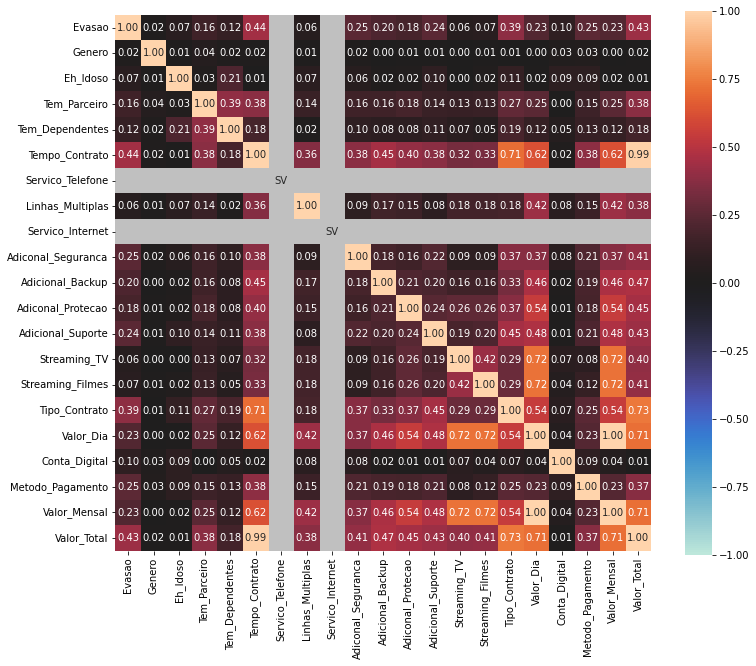

In [ ]:
from dython.nominal import associations

ax, corr = associations(dados_fibra, cramers_v_bias_correction = False, figsize = (12,10))

A matriz de correlação contém algumas informações faltantes: as colunas `Servico_Internet` e `Servico_Telefone` não possuem valores de correlação com as colunas

In [ ]:
def analisa_coluna(coluna):

    unicos = dados_fibra[coluna].unique()
    contagem = dados_fibra[coluna].value_counts()
    tipo = dados_fibra[coluna].dtype

    print(f'Valores únicos:')
    print(unicos)
    print('----------------')
    print(f'Contagem de valores:')
    print(contagem)
    print('----------------')
    print(f'Tipo da coluna:')
    print(tipo)
    print('----------------')

In [ ]:
analisa_coluna('Servico_Internet')

Valores únicos:
['Fibra Óptica']
----------------
Contagem de valores:
Fibra Óptica    3096
Name: Servico_Internet, dtype: int64
----------------
Tipo da coluna:
object
----------------


In [ ]:
analisa_coluna('Servico_Telefone')

Valores únicos:
['Sim']
----------------
Contagem de valores:
Sim    3096
Name: Servico_Telefone, dtype: int64
----------------
Tipo da coluna:
object
----------------


Como essas colunas possuem apenas um valor, elas não puderam ser analisadas durante a função de assossiação.

No entanto, isso trouxe uma informação importante: todos os clientes que possuem internet de Fibra Óptica, também possuem serviço de telefone.

Já a variável target, a coluna `Evasão`, possue relação média com outras 3 variáveis: `Tipo_Contrato`, `Tempo_Contrato` e `Valor_Total`. As outras variáveis mantém uma assossiação fraca ou bem fraca. 

#### Variável `Tipo_Contrato`

In [70]:
import plotly.express as px

dados_fibra.sort_values('Evasao', inplace = True)
fig = px.histogram(dados_fibra, x='Tipo_Contrato', color = 'Evasao',
                   barmode = 'group')

bota_titulo('Clientes de acordo com o tipo de contrato')

fig.update_xaxes(title_text='Tipo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tipo_Contrato", "Tipo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))


fig.show()

Percebe-se que os clientes que assinam fibra óptica optam mais por um plano mensal. Esse tipo de contrato também é o que mais sofre evasão. Os outros dois tipos de contrato não apresentam uma diferença.

#### Variável `Tempo_Contrato`

Primeiramente serão analisados os dados apenas dos clientes que cancelaram o contrato

In [71]:
import plotly.express as px

dados_fibra.sort_values('Tempo_Contrato', inplace = True)
temp = dados_fibra.query("Evasao == 'Sim'")
fig = px.histogram(temp, x='Tempo_Contrato')

bota_titulo('Clientes de acordo com o tempo de contrato')

fig.update_xaxes(title_text='Tipo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')



## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tipo_Contrato", "Tipo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))


fig.show()

A coluna com o tempo de contrato também aparenta manter a mesma distribuição quando comparada com os dados originais. Uma análise comparando apenas os primeiros 10 meses de contrato pode ser feita.

In [72]:
import plotly.express as px

temp = dados_fibra.query('Tempo_Contrato <= 10')
temp = temp.sort_values(by = ['Evasao', 'Tempo_Contrato'], ascending = True)


fig = px.histogram(temp, x='Tempo_Contrato', color = 'Evasao', barmode = 'group')

bota_titulo('Dispersão entre os contratos até 10 meses')

fig.update_xaxes(title_text='Tempo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')


fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tempo_Contrato", "Tempo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº clientes")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))


fig.show()

Novamente os clientes com menos tempo de contrato evadem mais do que ficam. Diferentemente da base de dados total, a quantidade de clientes evadidos se mantém maior que a de clientes na empresa além do 10 mês de contrato.

#### Variável `Valor_Total`

Como a variável é uma variável numérica, pode-se utilizar de outros tipos de gráfico para a análise. Para isso, será utilizada o [boxplot](https://plotly.github.io/plotly.py-docs/generated/plotly.express.box.html#plotly.express.box).

In [73]:
import plotly.express as px

dados_fibra.sort_values(by = 'Evasao', inplace = True)
fig = px.box(dados_fibra, x = 'Evasao', y='Valor_Total', color = 'Evasao')

bota_titulo('Boxplot de valor total pago por cliente')

fig.update_xaxes(title_text='Evasão',
                 type = 'category')
fig.update_yaxes(title_text='')

fig.update_layout(legend_title = 'Evasão')


fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tempo_Contrato", "Tempo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Clientes")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))

fig.show()

Percebe-se, pelo *boxplot*, que os clientes que cancelaram os planos pagaram menos, em média, que os que não cancelaram.

#### Conclusão

Dentre os clientes que contrataram Fibra Óptica, todos também contrataram serviços de telefonia. Os clientes dessa categoria também cancelam mais os contratos com tempo menor que 20 meses. A empresa deve tomar mais cuidado com os clientes novos, principalmente de serviços como o de Fibra Óptica.

## Considerações finais

Após as análises gráficas, alguns padrões foram notados na distribuição das variáveis:

1 - Os clientes evadidos possuem uma média de valor pago mensalmente maior que os clientes que não evadiram.

2 - Os clientes com menor tempo de contrato(1 a 10 meses) tem uma taxa de evasão maior que os outros clientes. Para clientes com 1 e 2 meses de contrato há mais clientes evadidos que clientes mantidos.

3 - Há uma taxa de evasão maior entre clientes que optaram por Fibra Óptica e uma taxa de evasão menor dentre os clientes que não possuem acesso à internet.

4 - Clientes com contrato mensal possuem uma taxa de evasão maior que os dois outros tipos de contrato.

5 - A escolha por conta digital também altera a taxa de evasão dos clientes, com clientes que possuem o serviço tendo uma taxa de evasão um pouco maior que o normal.

6 - Por último, os clientes que pagam por cheque eletrônico possuem uma taxa de evasão maior que os outros meios de pagamento.

Com essas análises feitas, é possível passar para a próxima etapa e criar o modelo de machine learning para a empresa poder descobrir clientes que possam decidir por fazer o cancelamento do contrato.